Plan
* EDA
* Feature Engineering
* Feature Selection
* Modelling
* HPO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)
sns.set()

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('train.csv')

In [3]:
train.shape, test.shape

((1460, 81), (1460, 81))

# EDA

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $ Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [4]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [5]:
def miss_table(data):
    miss_table=data.isna().sum().to_frame(name='Count')
    miss_table['Percent']=miss_table['Count']/len(data)*100
    miss_table['Dtype']=data.dtypes[miss_table.index]
    miss_table['Count']=miss_table['Count'].replace({0: np.nan})
    miss_table=miss_table.dropna()
    print(f"There are {len(miss_table)}/{data.shape[1]} columns with missing values")
    print('Distribution by dtypes:')
    print(miss_table['Dtype'].value_counts())
    return miss_table.sort_values(by='Count', ascending=False)

mt=miss_table(train)
mt

There are 19/81 columns with missing values
Distribution by dtypes:
object     16
float64     3
Name: Dtype, dtype: int64


Count    Percent    Dtype
PoolQC        1453.0  99.520548   object
MiscFeature   1406.0  96.301370   object
Alley         1369.0  93.767123   object
Fence         1179.0  80.753425   object
FireplaceQu    690.0  47.260274   object
LotFrontage    259.0  17.739726  float64
GarageType      81.0   5.547945   object
GarageYrBlt     81.0   5.547945  float64
GarageFinish    81.0   5.547945   object
GarageQual      81.0   5.547945   object
GarageCond      81.0   5.547945   object
BsmtExposure    38.0   2.602740   object
BsmtFinType2    38.0   2.602740   object
BsmtFinType1    37.0   2.534247   object
BsmtCond        37.0   2.534247   object
BsmtQual        37.0   2.534247   object
MasVnrArea       8.0   0.547945  float64
MasVnrType       8.0   0.547945   object
Electrical       1.0   0.068493   object

In [8]:
def target_missing(data, x, y='SalePrice'):
    null_target=data.loc[data[x].isna(), y]
    null_target_mean=null_target.mean()
    not_null_target=data.loc[data[x].notna(), y]
    not_null_target_mean=not_null_target.mean()
    return [null_target.shape[0], not_null_target.shape[0], null_target_mean, not_null_target_mean]


missing_target_df=pd.DataFrame(columns=['Missing', 'Non Missing', 'Missing Target', 'Non Missing Target'])

for c in mt.index:
    missing_target_df.loc[c]=target_missing(train, c)
    
missing_target_df['Target Diff']=missing_target_df['Missing Target']-missing_target_df['Non Missing Target']
missing_target_df.sort_values(['Target Diff'], ascending=[False])

Missing  Non Missing  Missing Target  Non Missing Target  \
MasVnrType        8.0       1452.0   236484.250000       180615.063361   
MasVnrArea        8.0       1452.0   236484.250000       180615.063361   
Alley          1369.0         91.0   183452.131483       142845.912088   
Fence          1179.0        281.0   187596.837998       152912.007117   
MiscFeature    1406.0         54.0   182046.410384       151623.944444   
LotFrontage     259.0       1201.0   181620.073359       180770.480433   
Electrical        1.0       1459.0   167500.000000       180930.394791   
BsmtFinType2     38.0       1422.0   110346.236842       182807.165260   
BsmtExposure     38.0       1422.0   107938.342105       182871.511252   
FireplaceQu     690.0        770.0   141331.482609       216397.692208   
BsmtFinType1     37.0       1423.0   105652.891892       182878.277583   
BsmtQual         37.0       1423.0   105652.891892       182878.277583   
BsmtCond         37.0       1423.0   105652.891892       182878.277583   
GarageQual       81.0       1379.0   103317.283951       185479.511240   
GarageCond       81.0       1379.0   103317.283951       185479.511240   
GarageFinish     81.0       1379.0   103317.283951       185479.511240   
GarageYrBlt      81.0       1379.0   103317.283951       185479.511240   
GarageType       81.0       1379.0   103317.283951       185479.511240   
PoolQC         1453.0          7.0   180404.663455       288138.571429   

                Target Diff  
MasVnrType     55869.186639  
MasVnrArea     55869.186639  
Alley          40606.219395  
Fence          34684.830881  
MiscFeature    30422.465940  
LotFrontage      849.592926  
Electrical    -13430.394791  
BsmtFinType2  -72460.928418  
BsmtExposure  -74933.169146  
FireplaceQu   -75066.209599  
BsmtFinType1  -77225.385691  
BsmtQual      -77225.385691  
BsmtCond      -77225.385691  
GarageQual    -82162.227289  
GarageCond    -82162.227289  
GarageFinish  -82162.227289  
GarageYrBlt   -82162.227289  
GarageType    -82162.227289  
PoolQC       -107733.907974

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [7]:
train.select_dtypes('object').nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

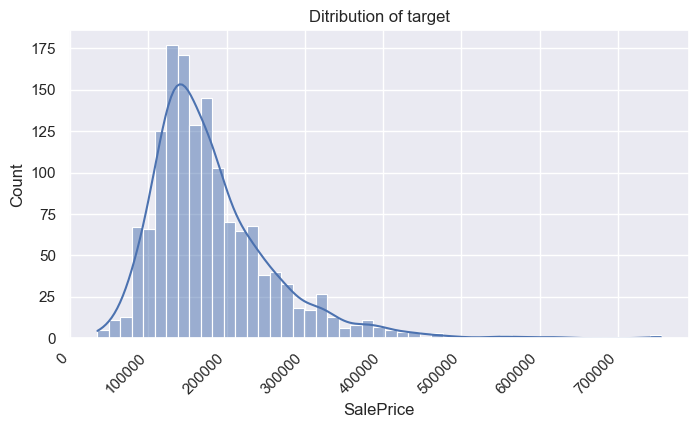

In [8]:
fig, axes=plt.subplots(figsize=(8,4))
sns.histplot(train['SalePrice'], kde=True, ax=axes);
plt.title('Ditribution of target')
plt.xticks(rotation=45, ha='right')
plt.show()

<AxesSubplot:>

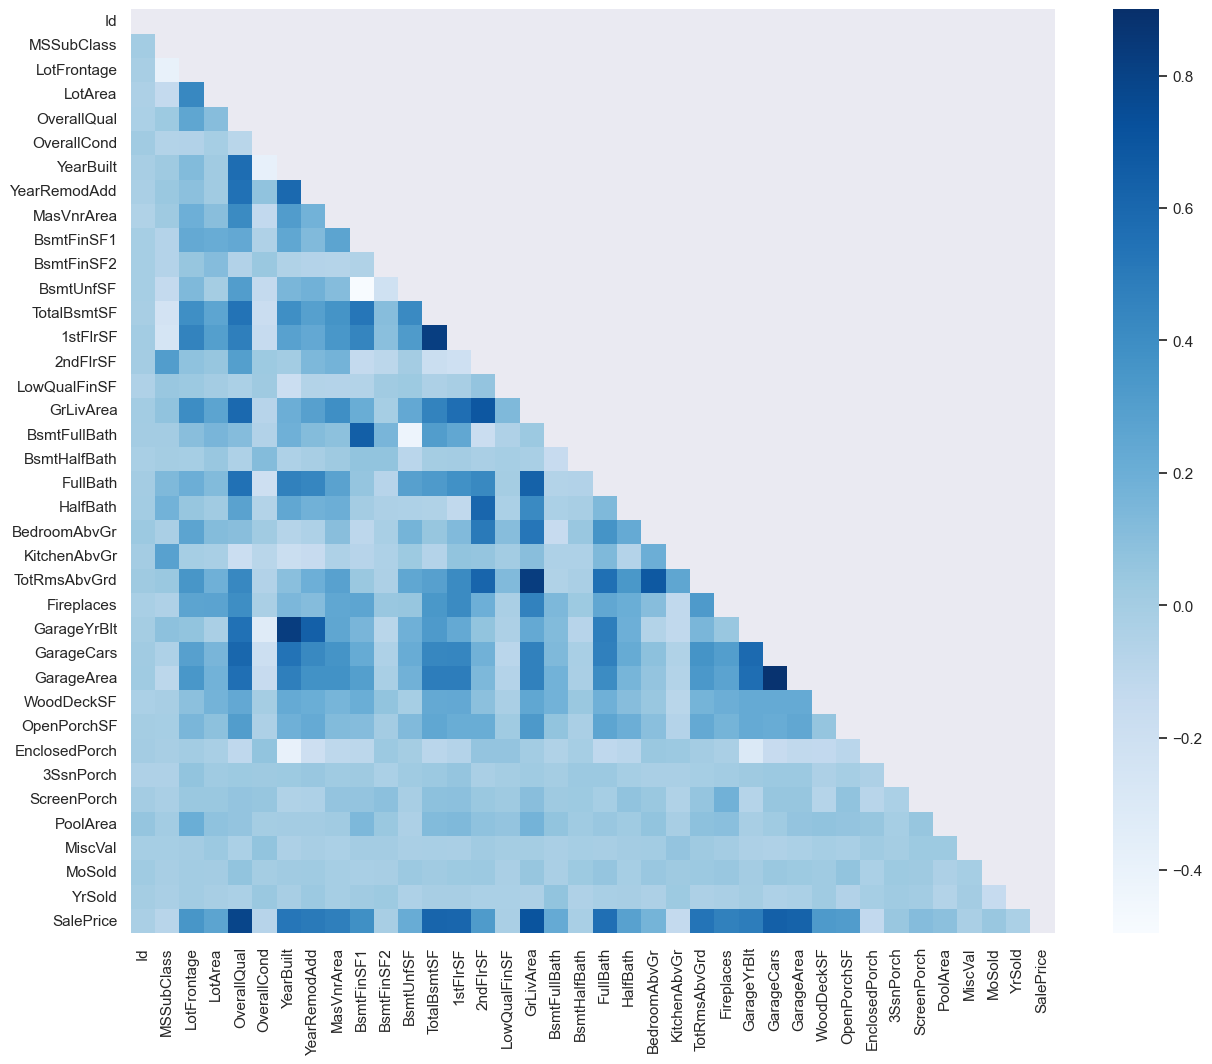

In [9]:
corr=train.corr()
mask=np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]=True

plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True, mask=mask)

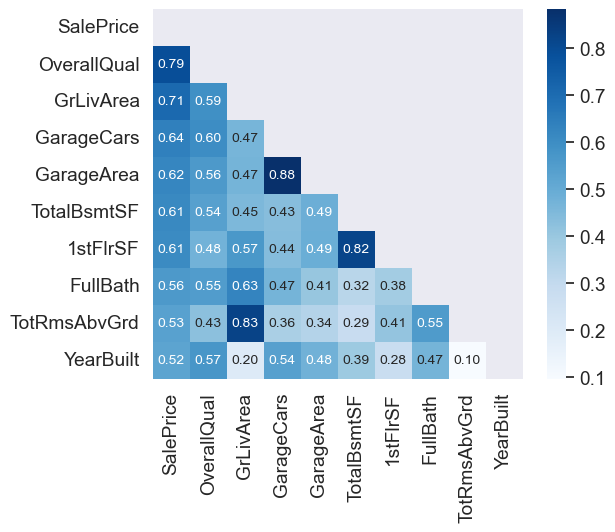

In [14]:
k=10 
cols=corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm=np.corrcoef(train[cols].values.T)

mask=np.zeros_like(cm, dtype=bool)
mask[np.triu_indices_from(mask)]=True

sns.set(font_scale=1.25)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', cmap="Blues", 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,
              mask=mask)
plt.show()

In [15]:
corr_target=train.corrwith(train['SalePrice']).sort_values()
corr_target.tail(15)

BsmtFinSF1      0.386420
Fireplaces      0.466929
MasVnrArea      0.477493
GarageYrBlt     0.486362
YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
dtype: float64

In [16]:
corr_target.head(15)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
dtype: float64

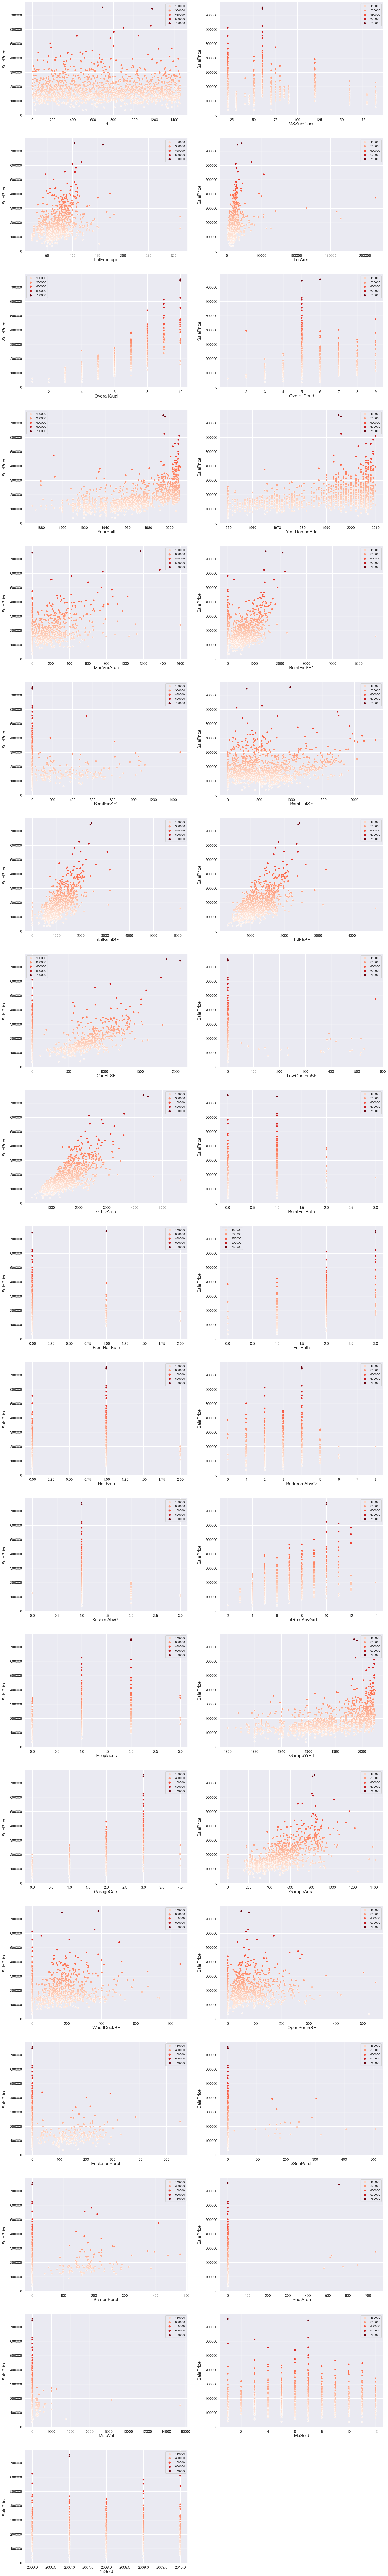

In [17]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in train.columns:
    if train[i].dtype in numeric_dtypes:
        numeric.append(i)


def num_scatter(data):
    fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(12, 85))
    plt.subplots_adjust(right=1.5)
    plt.subplots_adjust(top=1.5)
    for i, feature in enumerate(list(data[numeric]), 1):
        if(feature=='SalePrice'):
            break
        plt.subplot(int(np.ceil(len(list(data[numeric]))/2)), 2, i)
        sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Reds', data=data)

        plt.xlabel('{}'.format(feature), size=15, labelpad=1.5)
        plt.ylabel('SalePrice', size=15, labelpad=12.5)

        for j in range(2):
            plt.tick_params(axis='x', labelsize=12)
            plt.tick_params(axis='y', labelsize=12)

        plt.legend(loc='best', prop={'size': 10})

    plt.show()
    
num_scatter(train)

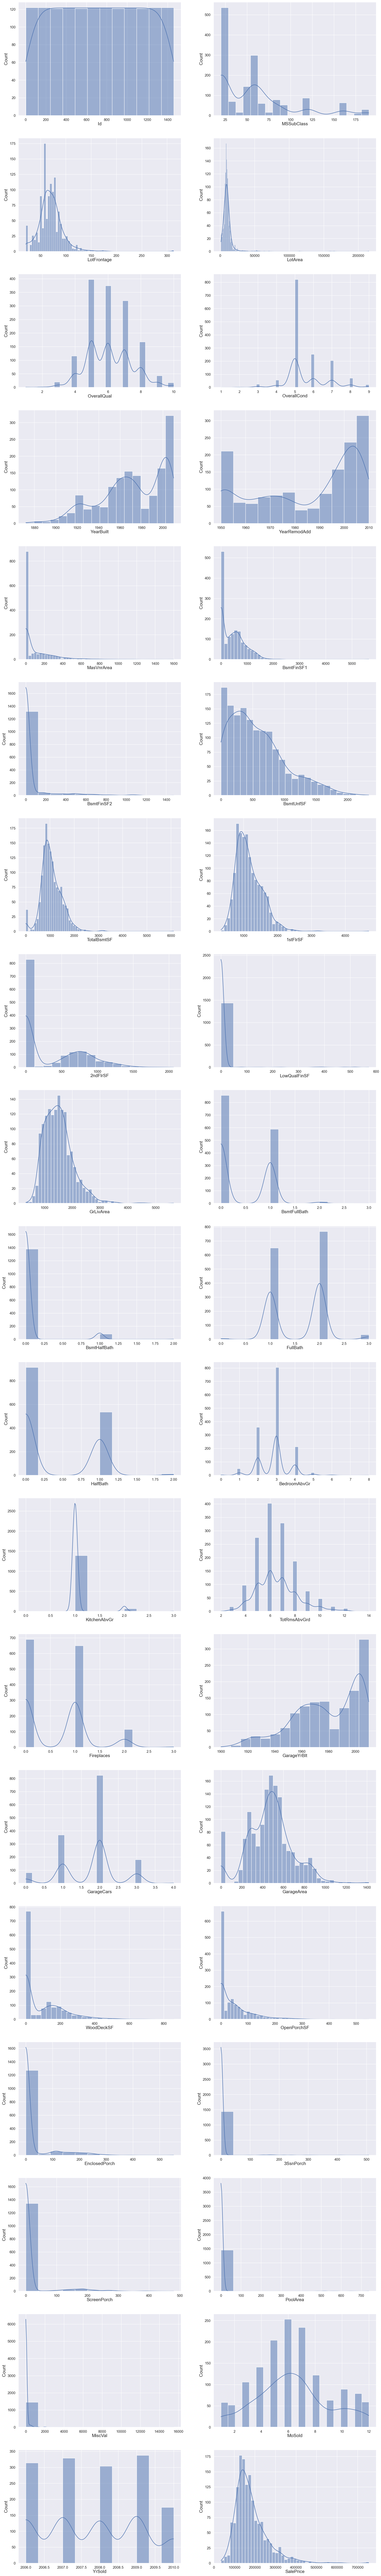

In [18]:
def num_dist(data):
    fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(12, 85))
    plt.subplots_adjust(right=1.5)
    plt.subplots_adjust(top=1.5)
    for i, feature in enumerate(list(data[numeric]), 1):
        plt.subplot(int(np.ceil(len(list(data[numeric]))/2)), 2, i)
        sns.histplot(x=feature, data=data, kde=True)

        plt.xlabel('{}'.format(feature), size=15, labelpad=1.5)

        for j in range(2):
            plt.tick_params(axis='x', labelsize=12)
            plt.tick_params(axis='y', labelsize=12)

    plt.show()
    
num_dist(train)

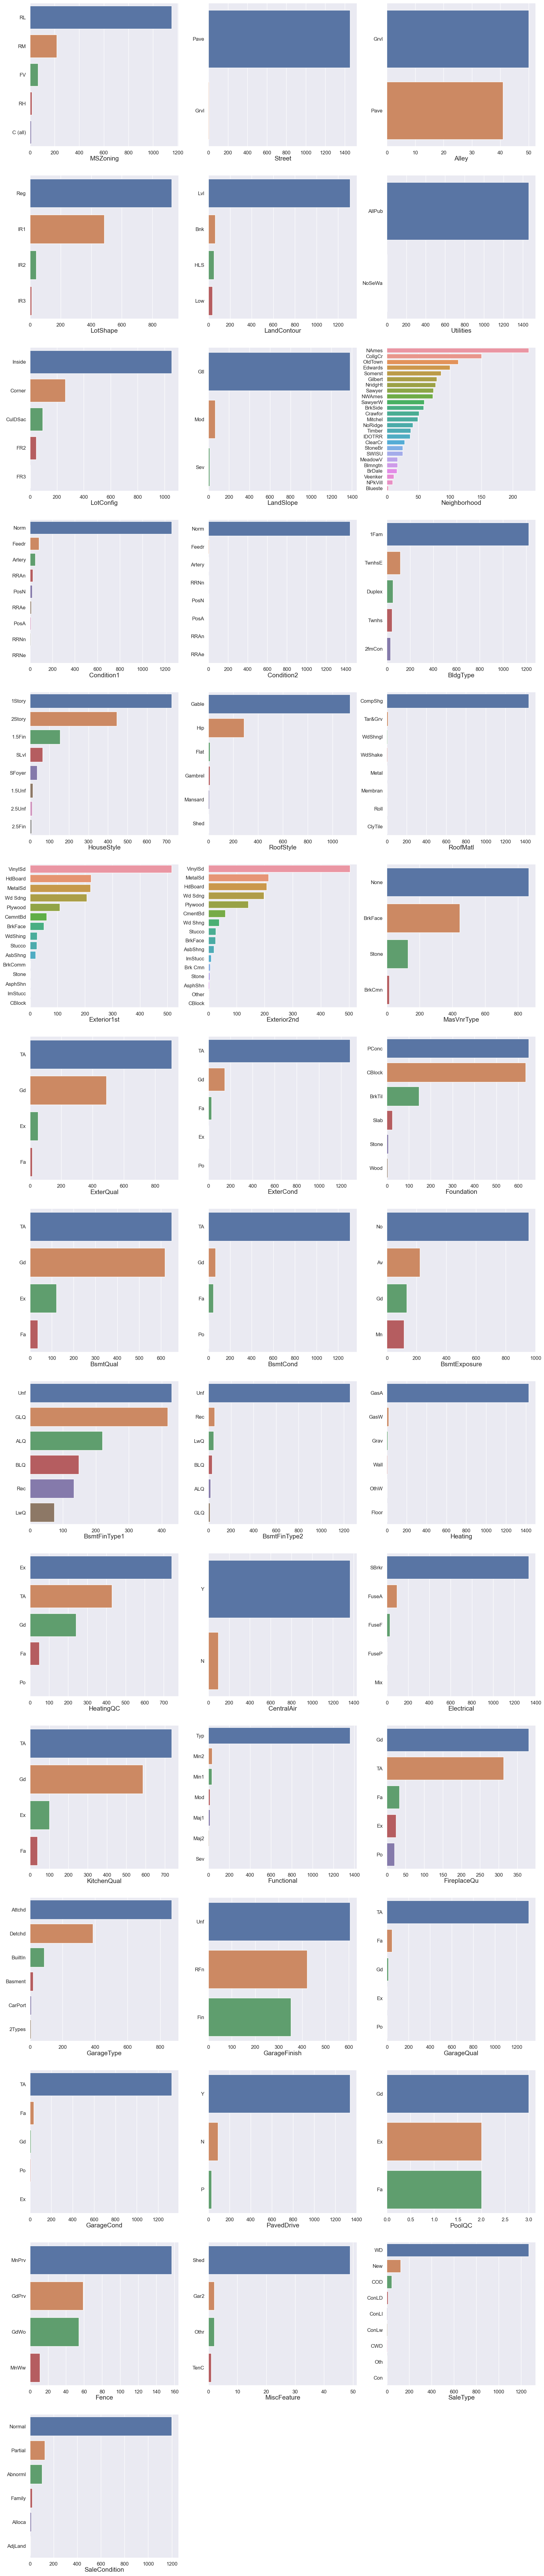

In [19]:
cat=train.select_dtypes('object').columns

def bar_cat(data):
    fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(12, 60))
    plt.subplots_adjust(right=1.5)
    plt.subplots_adjust(top=1.5)
    for i, feature in enumerate(cat, 1):
        plt.subplot(int(np.ceil(len(cat)/3)), 3, i)
        val_c=data[feature].value_counts().to_frame()
        sns.barplot(x=feature, y=val_c.index, data=val_c)

        plt.xlabel('{}'.format(feature), size=15, labelpad=1.5)

        for j in range(2):
            plt.tick_params(axis='x', labelsize=12)
            plt.tick_params(axis='y', labelsize=12)

    plt.show()
    
bar_cat(train)

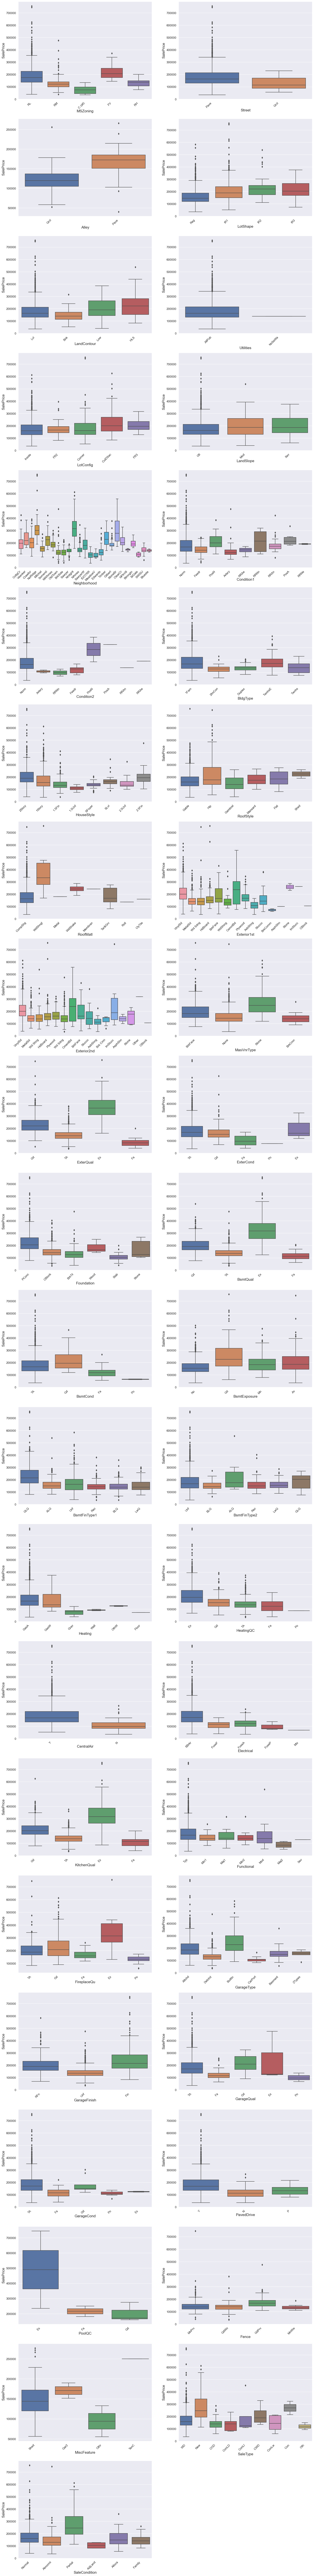

In [20]:
def box_cat(data):
    fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(12, 60))
    plt.subplots_adjust(right=1.5)
    plt.subplots_adjust(top=2.5)
    for i, feature in enumerate(cat, 1):
        plt.subplot(int(np.ceil(len(cat)/2)), 2, i)
        sns.boxplot(x=feature, y="SalePrice", data=data)
        plt.xticks(rotation=45, ha='right')
        plt.xlabel('{}'.format(feature), size=15, labelpad=1.5)

        for j in range(2):
            plt.tick_params(axis='x', labelsize=12)
            plt.tick_params(axis='y', labelsize=12)

    plt.show()
    
box_cat(train)

# Feature Engineering

In [21]:
train["SalePrice"]=np.log1p(train["SalePrice"])

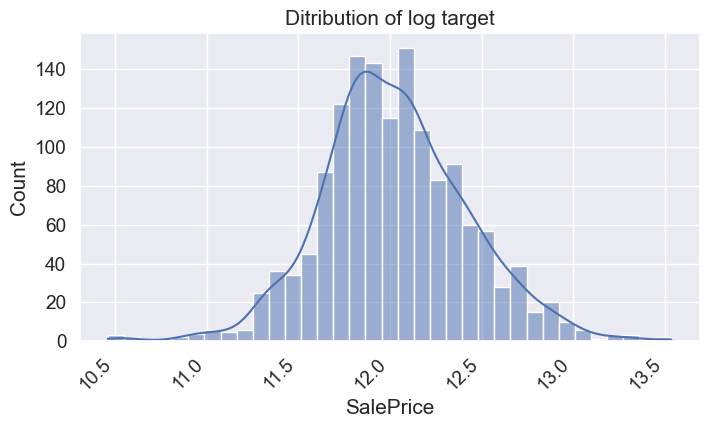

In [22]:
fig, axes=plt.subplots(figsize=(8,4))
sns.histplot(train['SalePrice'], kde=True, ax=axes);
plt.title('Ditribution of log target')
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
# dropping some outliers
to_drop=[]

to_drop.append(train[train['SalePrice']>np.log1p(700000)].index.values)
to_drop.append(train[train['LotFrontage']>300].index.values)
to_drop.append(train[train['LotArea']>150000].index.values)
to_drop.append(train[(train['YearBuilt']<1900) & (train['SalePrice']>np.log1p(200000))].index.values)
to_drop.append(train[train['MasVnrArea']>1400].index.values)
to_drop.append(train[(train['BsmtFinSF2']>400) & (train['BsmtFinSF2']<600) & (train['SalePrice']>np.log1p(500000))].index.values)
to_drop.append(train[train['1stFlrSF']>4000].index.values)
to_drop.append(train[train['GrLivArea']>4000].index.values)
to_drop.append(train[(train['GarageArea']>1200) & (train['SalePrice']<np.log1p(300000))].index.values)
to_drop.append(train[train['OpenPorchSF']>400].index.values)
to_drop.append(train[train['MiscVal']>8000].index.values)

to_drop=set(np.concatenate(to_drop).ravel())
len(to_drop)

22

In [27]:
to_drop

{185,
 249,
 297,
 304,
 313,
 335,
 346,
 440,
 495,
 523,
 581,
 583,
 691,
 747,
 854,
 934,
 1061,
 1182,
 1190,
 1230,
 1298,
 1328}

In [ ]:
train=train.drop(to_drop)

In [12]:
train['MSSubClass'].astype(str)=train['MSSubClass'].astype(str)

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: object

In [20]:
mt

Count    Percent    Dtype
PoolQC        1453.0  99.520548   object
MiscFeature   1406.0  96.301370   object
Alley         1369.0  93.767123   object
Fence         1179.0  80.753425   object
FireplaceQu    690.0  47.260274   object
LotFrontage    259.0  17.739726  float64
GarageType      81.0   5.547945   object
GarageYrBlt     81.0   5.547945  float64
GarageFinish    81.0   5.547945   object
GarageQual      81.0   5.547945   object
GarageCond      81.0   5.547945   object
BsmtExposure    38.0   2.602740   object
BsmtFinType2    38.0   2.602740   object
BsmtFinType1    37.0   2.534247   object
BsmtCond        37.0   2.534247   object
BsmtQual        37.0   2.534247   object
MasVnrArea       8.0   0.547945  float64
MasVnrType       8.0   0.547945   object
Electrical       1.0   0.068493   object

In [26]:
train['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [ ]:
def handle_missing(data):
    for c in ['PoolQC', 'MiscFeature', 'Alley']
        data[c]=data[c].fillna('NA')

In [ ]:
X, y=train.drop(['Id', 'SalePrice'], axis=1), train['SalePrice']

cat_cols, num_cols=X.select_dtypes(include=['category', 'object']).columns, X.select_dtypes('number').columns

ohe=OneHotEncoder(sparse=False, handle_unknown='ignore')
rob_sc=RobustScaler()
col_tr=ColumnTransformer([
    ('cat', ohe, cat_cols),
    ('num', rob_sc, num_cols)
])

X_tr=col_tr.fit_transform(X)
X_tr.shape

In [ ]:
import lightgbm as lgb

def custom_lgbm_cv(features, target, col_tran, k=5):
    metric_df=pd.DataFrame(columns=['Train rmse', 'Test rmse'])
    feat_importances=[]
    kfold=KFold(k)
    for f, (tr, te) in enumerate(kfold.split(features, y=target)):
        X_train, y_train=features.iloc[tr, :], target.iloc[tr]
        X_test, y_test=features.iloc[te, :], target.iloc[te]

        X_train_tr=col_tran.fit_transform(X_train)
        X_test_tr=col_tran.transform(X_test)

        params={'num_boost_round': 150,
                'max_depth': 4,
                'metric': 'rmse',
                'learning_rate': 0.1,
                'reg_alpha': 0.1,
                'reg_lambda': 0.1,
                'subsample': 0.8,
                'n_jobs': -1,
                'random_state': 5,
                'verbose': -1}

        dtrain=lgb.Dataset(X_train_tr, label=y_train)
        dval=lgb.Dataset(X_test_tr, label=y_test)

        model=lgb.train(
                params=params,
                train_set=dtrain,
                valid_sets=[dtrain, dval],
                valid_names=['train', 'test'],
                callbacks=[lgb.early_stopping(10, verbose=-1), lgb.log_evaluation(-1)],
        categorical_feature=a
        )
        
        test_score, train_score=model.best_score['test']['rmse'], model.best_score['train']['rmse']
        metric_df.loc[f]=[train_score, test_score]

    metric_df.loc['Avg']=[metric_df['Train rmse'].mean(), metric_df['Test rmse'].mean()]
    return metric_df

In [ ]:
a=[]

for i in  train.columns:
    if i in cat_cols:
        a.append(1)
    else:
        a.append(0)

In [ ]:
def quick_cv(df):
    X, y=train.drop(['Id', 'SalePrice'], axis=1), train['SalePrice']

    cat_cols, num_cols=X.select_dtypes(include=['category', 'object']).columns, X.select_dtypes('number').columns

    ohe=OneHotEncoder(sparse=False, handle_unknown='ignore')
    ordin=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    rob_sc=RobustScaler()
    col_tr=ColumnTransformer([
        ('cat', ordin, cat_cols),
        ('num', 'passthrough', num_cols)
    ])


    res=custom_lgbm_cv(X, y, col_tr)
    return res

res=quick_cv(train)
res